## Import libraries and dataset

In [1]:
# Import all required libraries 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

## Familiarize with the data

In [2]:
crops.head(10)

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
5,69,37,42,7.073454,rice
6,69,55,38,5.700806,rice
7,94,53,40,5.718627,rice
8,89,54,38,6.685346,rice
9,68,58,38,6.336254,rice


In [3]:
crops.tail(5)

,N,P,K,ph,crop
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee
2199,104,18,30,6.779833,coffee


In [4]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [5]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [6]:
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
crops.isnull().sum().sort_values()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

## Data Preprocessing

In [8]:
#convert categorical string values to numerical values
#using LabelEncoder
from sklearn.preprocessing import LabelEncoder
#implementing the model
le= LabelEncoder()
crops['crop']= le.fit_transform(crops['crop'])


In [9]:
crops.tail(20)

,N,P,K,ph,crop
2180,80,18,31,7.303033,5
2181,101,31,26,6.861235,5
2182,103,33,33,7.131436,5
2183,93,26,27,7.288212,5
2184,104,35,28,6.983732,5
2185,116,36,25,6.172090,5
2186,107,38,29,6.351182,5
2187,101,33,33,6.908671,5
2188,107,31,31,6.766184,5
2189,99,16,30,6.392792,5


In [10]:
crops['crop'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

## Visualize data

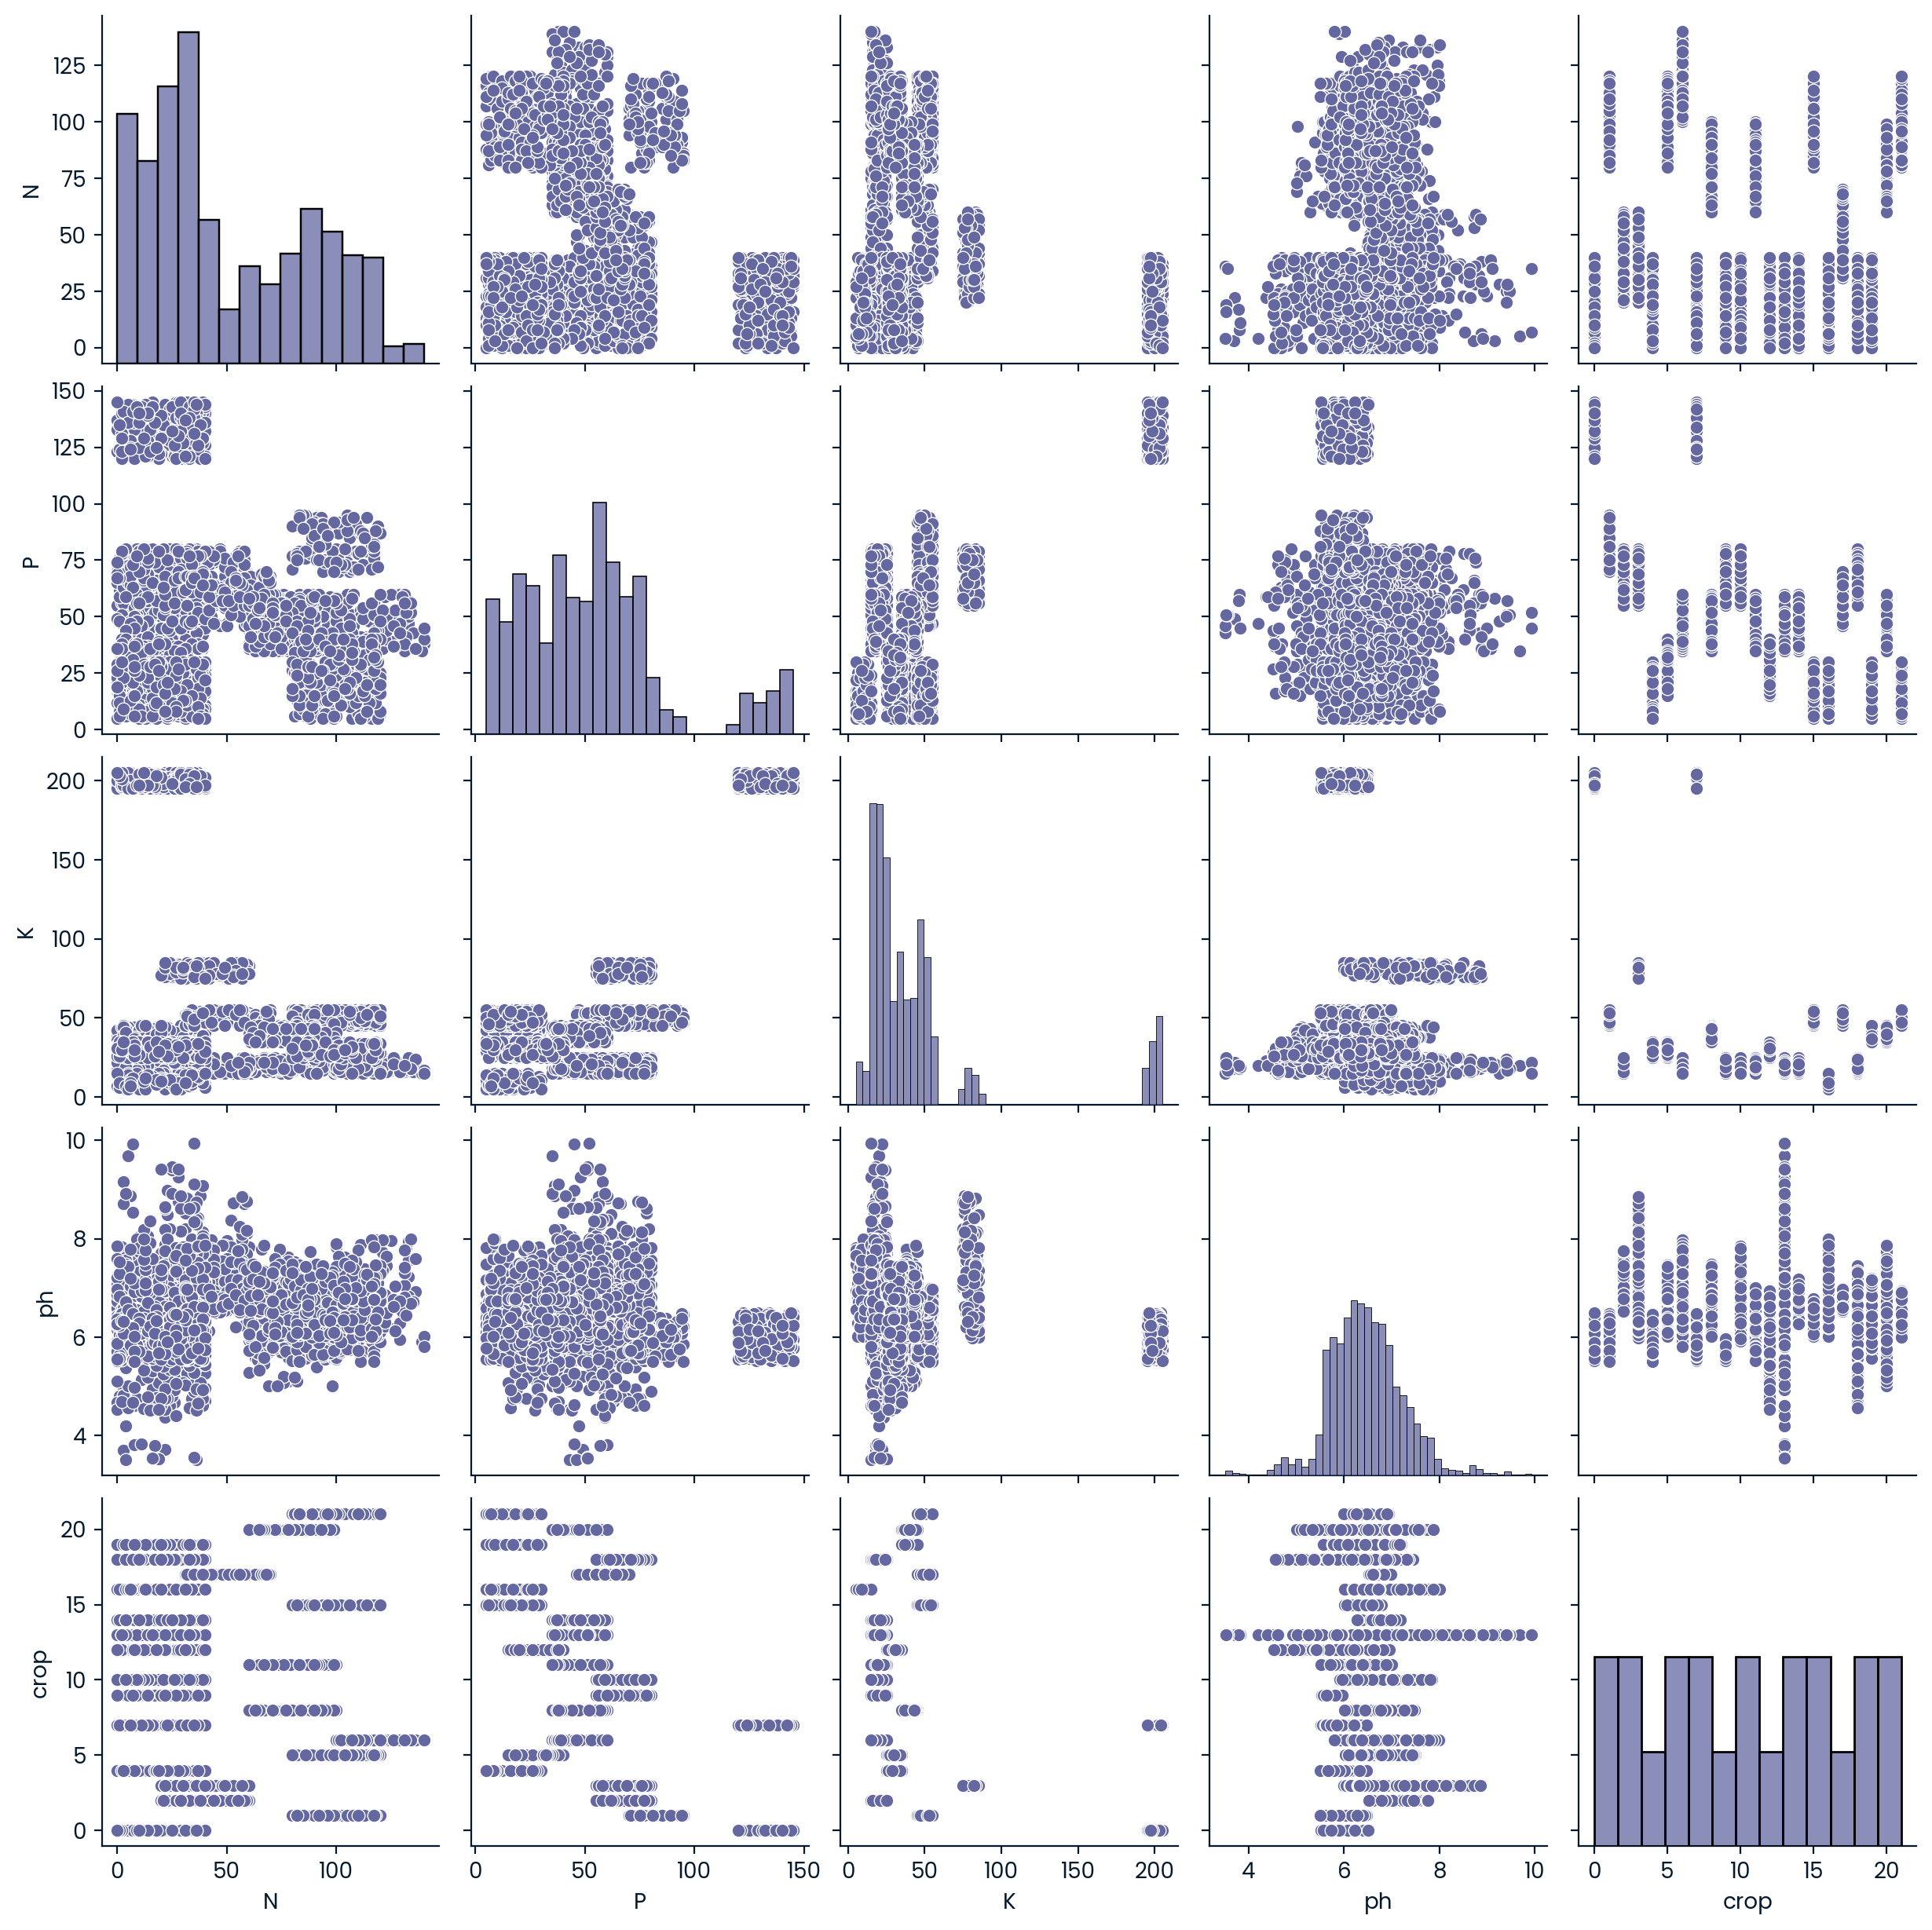

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=crops);

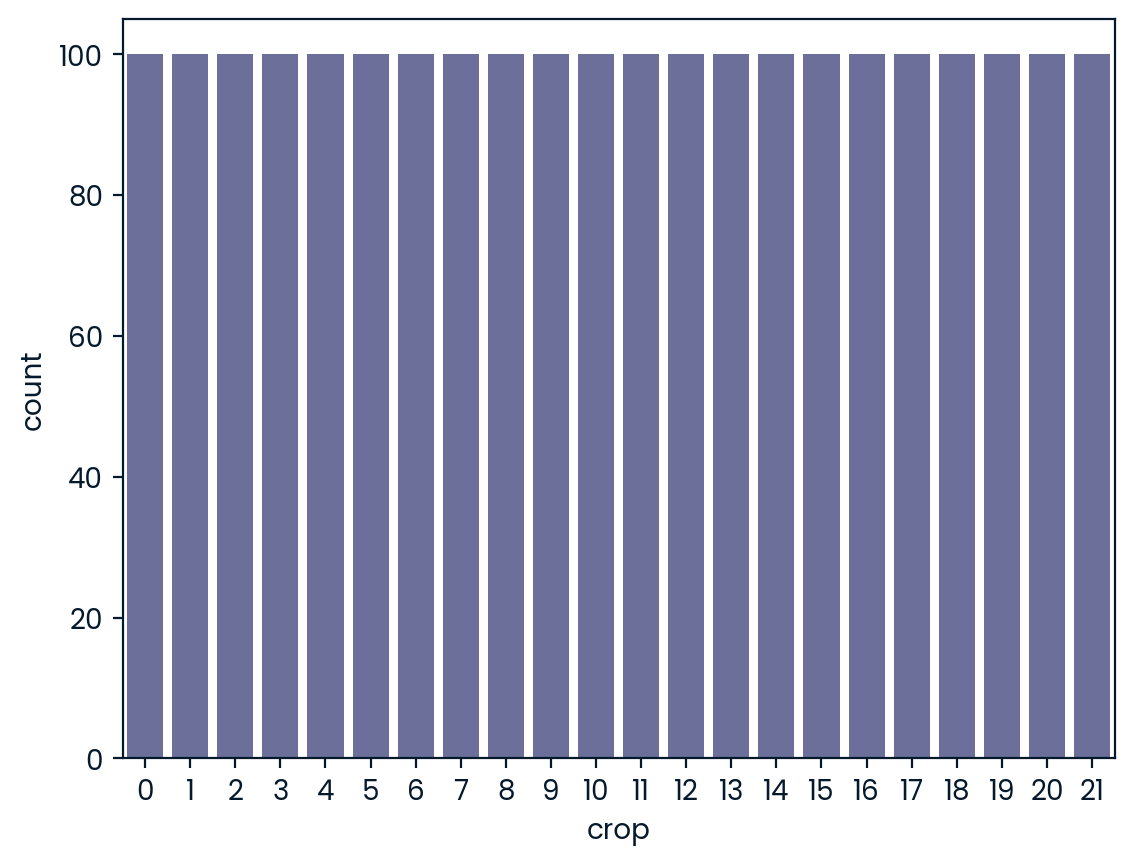

In [12]:
sns.countplot(x= 'crop', data= crops);

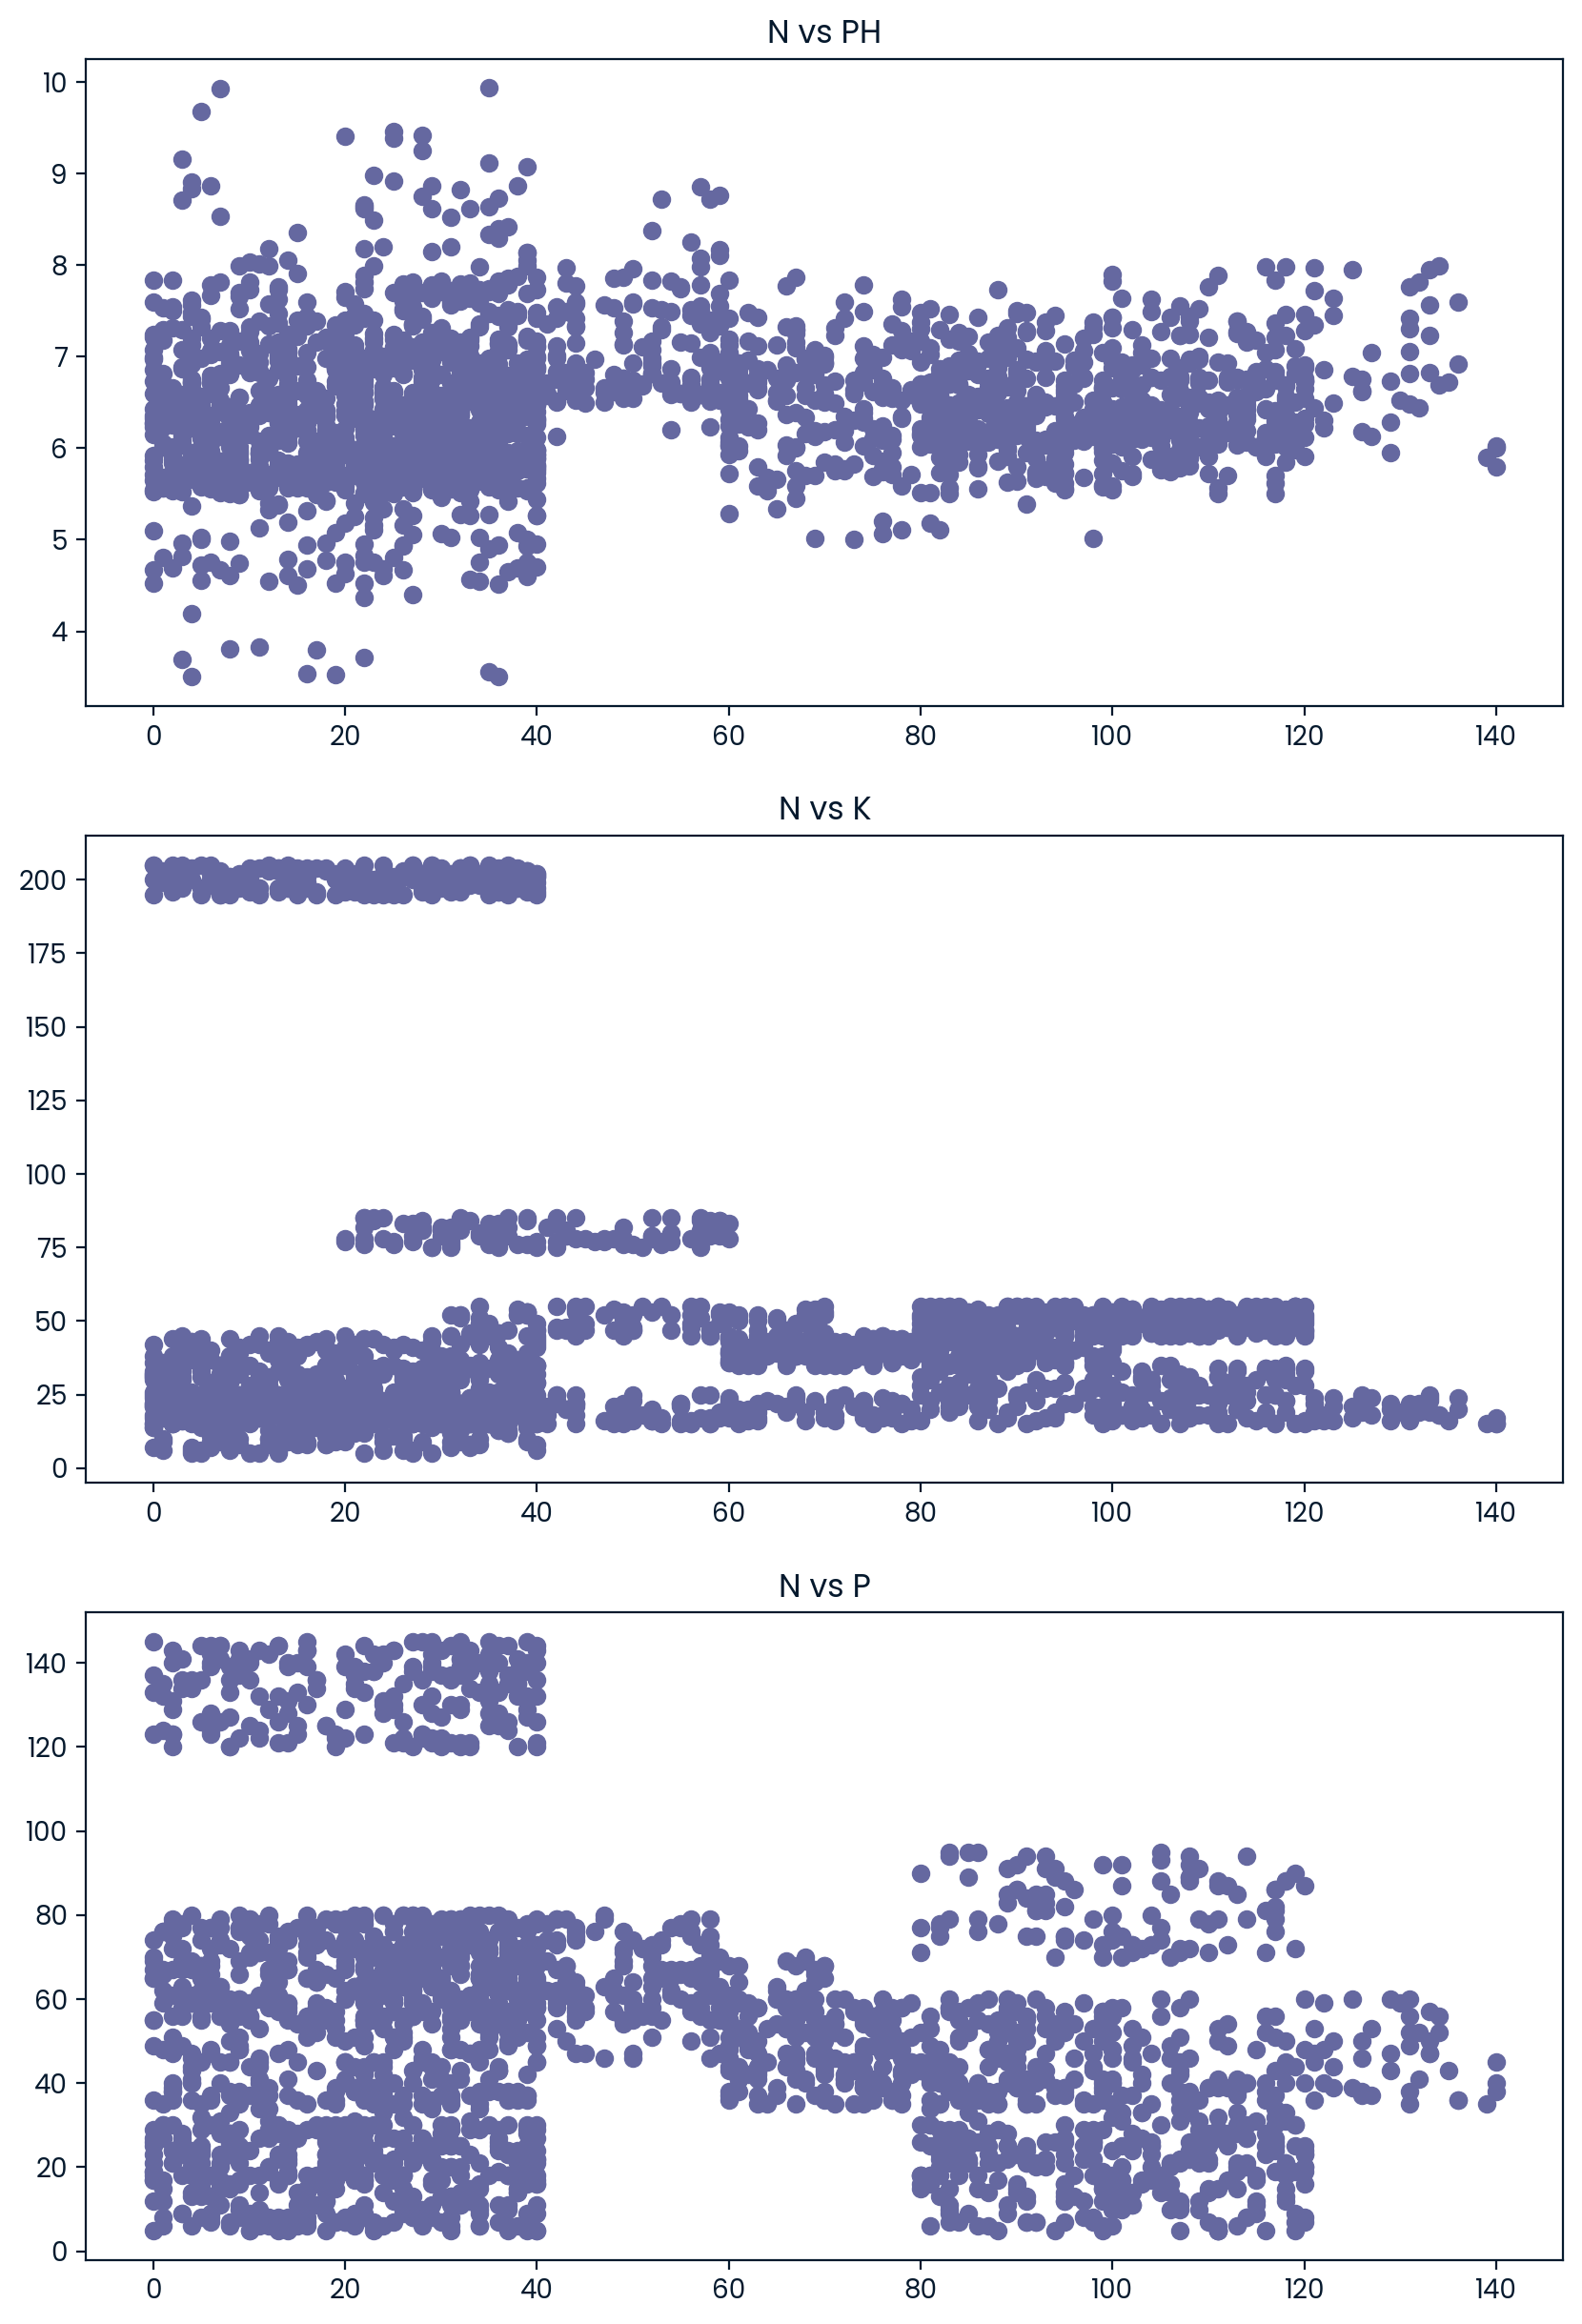

In [13]:
import matplotlib.pyplot as plt

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 1, figsize= (10,15))

# For Sine Function
axis[0].scatter(x='N', y='ph', data=crops)
axis[0].set_title("N vs PH")

# For Cosine Function
axis[1].scatter(x='N', y='K', data=crops)
axis[1].set_title("N vs K")

# For Tangent Function
axis[2].scatter(x='N', y='P', data=crops)
axis[2].set_title("N vs P")

# Combine all the operations and display
plt.show()

## Specify the features and target variable

In [14]:
#get the independent and dependent variables
X= crops.drop(columns="crop")
y = crops["crop"]

In [15]:
#split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=17
)

In [16]:

print(X_train.shape)
print(y_train.shape)

(1540, 4)
(1540,)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Fit a RandomForestClassifier

In [42]:
#import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
SEED= 1010
#create the classifier
rf= RandomForestClassifier(n_estimators=500, random_state= SEED)
#Train the model
rf.fit(X_train_scaled, y_train)

#make prediction using the test dataset
y_rf_prediction=rf.predict(X_test_scaled)

In [43]:
accuracy1= metrics.accuracy_score(y_rf_prediction, y_test)
accuracy1

0.7909090909090909

In [48]:
#hypertune parameters for the rf model
print(rf.get_params())
param_grid = {
    'max_depth': range(2,20,2),
    'max_features': ['auto','log2'],
    'criterion':['gini','entropy']
}

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 1010, 'verbose': 0, 'warm_start': False}


In [49]:
from sklearn.model_selection import RandomizedSearchCV
rf_rdm= RandomizedSearchCV(estimator=rf, param_distributions= param_grid,cv=5, n_jobs=4, verbose=True, random_state=SEED)

In [50]:
#get the best parameters
best_estimators = rf_rdm.fit(X_train_scaled,y_train)
rf_model= best_estimators.best_estimator_

best_estimators.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}

In [51]:
#predict and model's accuracy
rf_predictions= rf_model.predict(X_test_scaled)
accuracy2= metrics.accuracy_score(rf_predictions, y_test)
accuracy2

0.7924242424242425

In [24]:

def crop_prediction_and_feature_importance_rf(crops):  
    features= X.columns
    features
    target= y
    target
    
    importance = {}
    for i, feature in enumerate(features):
        importance[feature] = rf_model.feature_importances_[i] # Use feature_importances_ attribute
    
    best_feature = max(importance, key=importance.get)
    
    return {"accuracy": accuracy2, "best_feature": best_feature, "feature_importance": importance}

#get the result
result = crop_prediction_and_feature_importance_rf(crops)
print(result)

{'accuracy': 0.7727272727272727, 'best_feature': 'K', 'feature_importance': {'N': 0.19868418373510607, 'P': 0.28562937656040316, 'K': 0.40512980983835184, 'ph': 0.11055662986613896}}


## Try a LogisticRegression model

In [25]:
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [26]:
#make predictions
y_predict= logreg.predict(X_test_scaled)

In [27]:
#using classificatin_report and accuracy_score
metrics.classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.40      0.74      0.52        23\n           1       0.97      1.00      0.98        28\n           2       0.75      0.64      0.69        33\n           3       0.96      1.00      0.98        22\n           4       0.65      0.77      0.71        31\n           5       0.89      0.86      0.87        36\n           6       0.87      0.87      0.87        31\n           7       0.60      0.26      0.37        34\n           8       0.53      0.73      0.61        26\n           9       0.00      0.00      0.00        38\n          10       0.33      0.61      0.42        23\n          11       0.87      0.94      0.91        36\n          12       0.62      0.43      0.51        30\n          13       0.18      0.06      0.10        31\n          14       0.58      0.66      0.61        29\n          15       0.52      0.54      0.53        26\n          16       0.97      1.00      0.99        34\n       

In [28]:
accuracy= metrics.accuracy_score(y_test, y_predict)* 100
accuracy

65.0

In [29]:
#Hyperparameter tuning to improve the model's accuracy
import numpy as np
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear'],
    'max_iter'  : [100,1000,1500,2000]
}
]

In [30]:
#get the best possible combination of hyperparameters
from sklearn.model_selection import GridSearchCV
logreg_imp= GridSearchCV(logreg,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)


In [31]:
#get the best parameters
best_estimators = logreg_imp.fit(X_train_scaled,y_train)
model= best_estimators.best_estimator_

best_estimators.best_params_

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


{'C': 3792.690190732246,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [32]:
#make predictions using the best estimators
y_pred_improved= model.predict(X_test_scaled)

In [54]:
accuracy_imp= metrics.accuracy_score(y_pred_improved, y_test)*100

In [34]:
#define a function that returns the accuracy of the model and the best predictive feature
def crop_prediction_and_feature_importance_lr(crops):
    features= X.columns
    features
    target= y
    target
    
    importance = {}
    for i, feature in enumerate(features):
        importance[feature] = abs(model.coef_[:, i]).mean() # Mean of absolute coefficients, higher is more important.

    best_feature = max(importance, key=importance.get)

    return {"accuracy": accuracy_imp, "best_feature": best_feature, "feature_importance": importance}
#get the result
result_lr = crop_prediction_and_feature_importance_lr(crops)
print(result)
    

{'accuracy': 0.7727272727272727, 'best_feature': 'K', 'feature_importance': {'N': 0.19868418373510607, 'P': 0.28562937656040316, 'K': 0.40512980983835184, 'ph': 0.11055662986613896}}


## Exploring other models

In [37]:
#Trial using another model
#Support Vector Machine

from sklearn import svm

#create the classifier
clf= svm.SVC(kernel = 'linear')

#Train the model
clf.fit(X_train_scaled, y_train)

#make prediction using the test dataset
y_svm_prediction=clf.predict(X_test_scaled)

#model's accuracy
accuracy3= metrics.accuracy_score(y_svm_prediction, y_test)
accuracy3

0.6712121212121213